# Advanced Tutorial on Implementing parallelFPGrowth Algorithm

 In this tutorial, we will discuss the second  approach to find frequent patterns in big data using parallelFPGrowth algorithm.


 
 [__Advanced approach:__](#advApproach) Here, we generalize the basic approach by presenting the steps to discover frequent patterns using multiple minimum support values.

***

#### In this tutorial, we explain how the parallel Frequent Pattern Growth (parallelFPGrowth) algorithm  can be implemented by varying the minimum support values

#### Step 1: Import the parallelFPGrowth algorithm and pandas data frame

In [1]:
from PAMI.frequentPattern.pyspark import parallelFPGrowth  as alg
import pandas as pd

#### Step 2: Specify the following input parameters

In [2]:
inputFile = 'transactional_T10I4D100K.csv'
seperator='\t'
mumberWorkersCount=4
minimumSupportCountList = [100, 150, 200, 250, 300] 
#minimumSupport can also specified between 0 to 1. E.g., minSupList = [0.005, 0.006, 0.007, 0.008, 0.009]

result = pd.DataFrame(columns=['algorithm', 'minSup', 'patterns', 'runtime', 'memory']) 
#initialize a data frame to store the results of parallelFPGrowth algorithm

#### Step 3: Execute the parallelFPGrowth algorithm using a for loop

In [3]:
algorithm = 'parallelFPGrowth'  #specify the algorithm name
for minSupCount in minimumSupportCountList:
    obj = alg.parallelFPGrowth('transactional_T10I4D100K.csv', minSup=minSupCount,numWorkers=mumberWorkersCount, sep=seperator)
    obj.startMine()
    #store the results in the data frame
    result.loc[result.shape[0]] = [algorithm, minSupCount, len(obj.getPatterns()), obj.getRuntime(), obj.getMemoryRSS()]


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


22/08/29 19:02:00 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


Frequent patterns were generated successfully using Parallel FPGrowth algorithm


Frequent patterns were generated successfully using Parallel FPGrowth algorithm


Frequent patterns were generated successfully using Parallel FPGrowth algorithm


Frequent patterns were generated successfully using Parallel FPGrowth algorithm


Frequent patterns were generated successfully using Parallel FPGrowth algorithm


In [4]:
print(result)

          algorithm  minSup  patterns    runtime     memory
0  parallelFPGrowth     100     27532  16.032353  133996544
1  parallelFPGrowth     150     19126  10.848076  133193728
2  parallelFPGrowth     200     13255   9.608693  133648384
3  parallelFPGrowth     250      7703   8.604640  133730304
4  parallelFPGrowth     300      4552   8.568295  133730304


#### Step 5: Visualizing the results

##### Step 5.1 Importing the plot library

In [5]:
from PAMI.extras.graph import plotLineGraphsFromDataFrame as plt

##### Step 5.2. Plotting the number of patterns

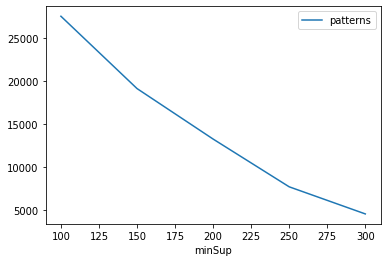

Graph for No Of Patterns is successfully generated!


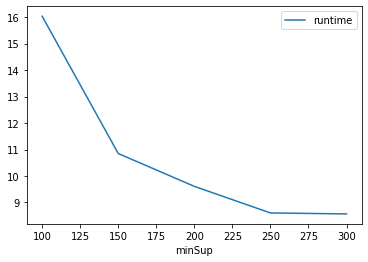

Graph for Runtime taken is successfully generated!


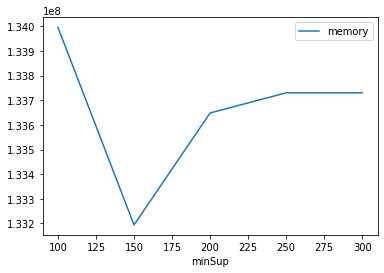

Graph for memory consumption is successfully generated!


In [6]:
ab = plt.plotGraphsFromDataFrame(result)
ab.plotGraphsFromDataFrame() #drawPlots()

### Step 6: Saving the results as latex files

In [7]:
from PAMI.extras.graph import generateLatexFileFromDataFrame as gdf
gdf.generateLatexCode(result)

Latex files generated successfully
